In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Coaches

### Preprocesamiento de datos

In [169]:
df_coaches = pd.read_csv('../Fifa Data Analysis/Datasets/2023/male_coaches_23.csv')
df_coaches.head()

,coach_id,coach_url,short_name,long_name,dob,nationality_id,nationality_name,face_url
0,24,/coach/24/david-unsworth/,D. Unsworth,David Unsworth,1973-10-16,14,England,NaN
1,50,/coach/50/steven-gerrard/,S. Gerrard,Steven Gerrard,1980-05-30,14,England,https://cdn.sportmonks.com/images/soccer/playe...
2,95,/coach/95/frank-lampard/,F. Lampard,Frank Lampard,1978-06-20,14,England,https://cdn.sportmonks.com/images/soccer/playe...
3,121,/coach/121/carl-hoefkens/,C. Hoefkens,Carl Hoefkens,1978-10-05,7,Belgium,https://cdn.sportmonks.com/images//soccer/coac...
4,123,/coach/123/matthew-etherington/,M. Etherington,Matthew Etherington,1981-08-14,14,England,https://cdn.sportmonks.com/images/soccer/playe...


#### Eliminar columnas innecesarias

In [170]:
df_coaches = df_coaches.drop(columns=['coach_url', 'nationality_id', 'face_url', 'short_name'])

#### Renombrar columnas

In [171]:
df_coaches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coach_id          1155 non-null   int64 
 1   long_name         1155 non-null   object
 2   dob               1072 non-null   object
 3   nationality_name  1155 non-null   object
dtypes: int64(1), object(3)
memory usage: 36.2+ KB


In [172]:
df_coaches = df_coaches.rename(columns={'long_name' : 'Name', 'dob' : 'Birth', 'nationality_name' : 'Nationality'})
df_coaches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   coach_id     1155 non-null   int64 
 1   Name         1155 non-null   object
 2   Birth        1072 non-null   object
 3   Nationality  1155 non-null   object
dtypes: int64(1), object(3)
memory usage: 36.2+ KB


#### Modificar formato de columna Birth

In [173]:
df_coaches['Birth'] = pd.to_datetime(df_coaches['Birth'], format='%Y-%m-%d')

#### Verificar valores nulos

In [174]:
df_coaches.isnull().sum()

coach_id        0
Name            0
Birth          83
Nationality     0
dtype: int64

#### Rellenar los valores nulos con el valor más frecuente

In [175]:
# df_coaches['Birth'] = df_coaches['Birth'].fillna(df_coaches['Birth'].mode()[0])

#### Eliminar los valores nulos

In [176]:
df_coaches = df_coaches.dropna()

In [177]:
df_coaches.isnull().sum()

coach_id       0
Name           0
Birth          0
Nationality    0
dtype: int64

#### Agregar columna edad

In [178]:
df_coaches['Age'] = pd.to_datetime('today').year - df_coaches['Birth'].dt.year
df_coaches['Age'] = df_coaches['Age'].astype(int)

### Análisis de datos

In [179]:
df_coaches

,coach_id,Name,Birth,Nationality,Age
0,24,David Unsworth,1973-10-16,England,52
1,50,Steven Gerrard,1980-05-30,England,45
2,95,Frank Lampard,1978-06-20,England,47
3,121,Carl Hoefkens,1978-10-05,Belgium,47
4,123,Matthew Etherington,1981-08-14,England,44
...,...,...,...,...,...
1148,37662210,Orlando Ribeiro de Oliveira,1967-01-09,Brazil,58
1149,37663858,Óscar Villegas,1970-04-15,Bolivia,55
1150,37664674,Galileo Percovich,1968-04-20,Uruguay,57
1151,37664710,Marcelo Saralegui Arregín,1971-05-18,Uruguay,54


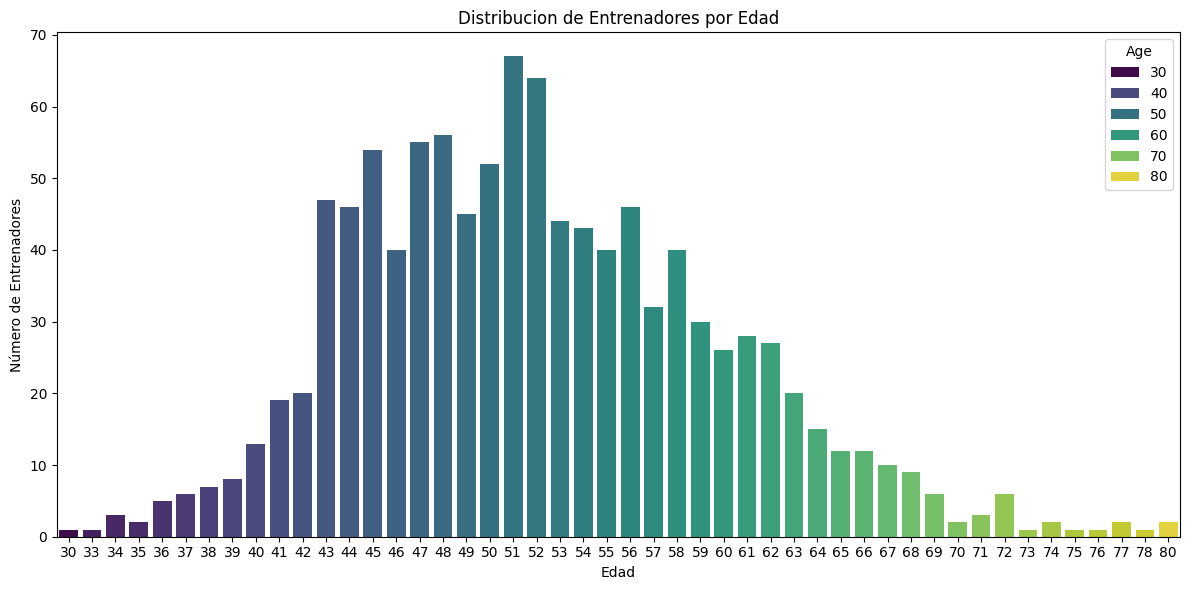

In [180]:
data = df_coaches['Age'].value_counts().reset_index()
data.columns = ['Age', 'Count']
data = data.sort_values(by='Age')

plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Count', data=data, palette='viridis', hue='Age')
plt.title('Distribucion de Entrenadores por Edad')
plt.xlabel('Edad')
plt.ylabel('Número de Entrenadores')
# plt.grid(axis='y')
plt.tight_layout()
plt.show()

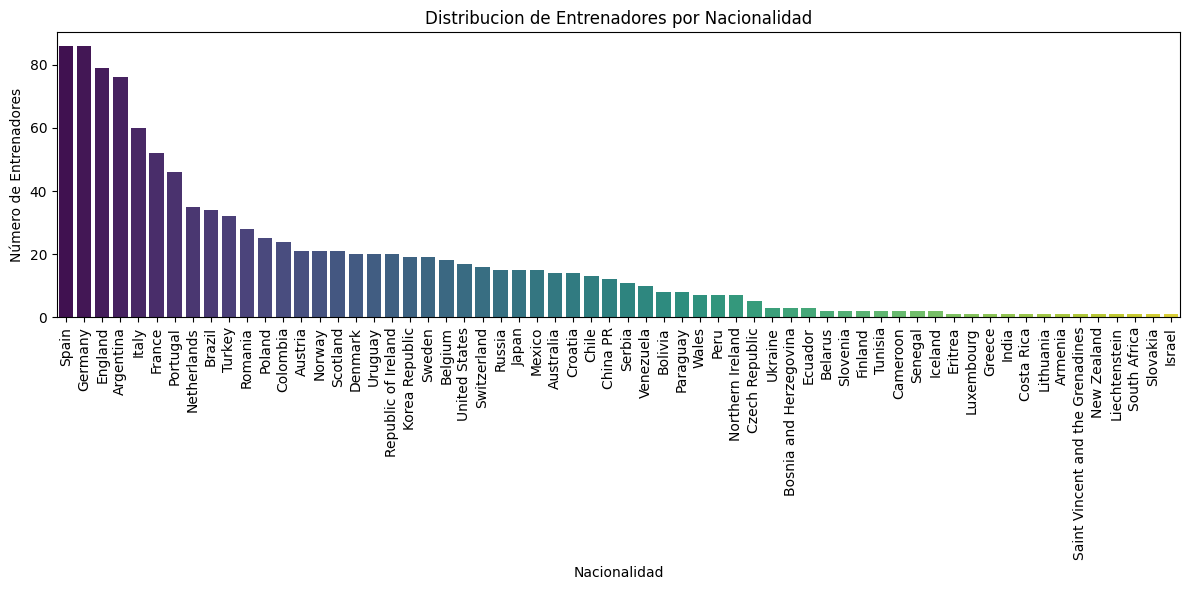

In [181]:
data = df_coaches['Nationality'].value_counts().reset_index()
data.columns = ['Nationality', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Nationality', y='Count', palette='viridis', hue='Nationality')
plt.title('Distribucion de Entrenadores por Nacionalidad')
plt.xlabel('Nacionalidad')
plt.ylabel('Número de Entrenadores')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Teams

### Preprocesamiento y Análisis de datos

In [182]:
df_teams = pd.read_csv('../Fifa Data Analysis/Datasets/2023/male_teams_23.csv')
df_teams.head()

/var/folders/ph/kk5ffp952hx0h94c23f3_n7r0000gn/T/ipykernel_90698/482380162.py:1: DtypeWarning: Columns (32,38,39,40,41,49,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_teams = pd.read_csv('../Fifa Data Analysis/Datasets/2023/male_teams_23.csv')


,team_id,team_url,fifa_version,fifa_update,fifa_update_date,team_name,league_id,league_name,league_level,nationality_id,...,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning
0,10,/team/10/manchester-city/230009,23,9,2023-01-13,Manchester City,13,Premier League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73,/team/73/paris-saint-germain/230009,23,9,2023-01-13,Paris Saint Germain,16,Ligue 1,1.0,18,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,243,/team/243/real-madrid/230009,23,9,2023-01-13,Real Madrid,53,La Liga,1.0,45,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1337,/team/1337/germany/230009,23,9,2023-01-13,Germany,78,Friendly International,NaN,21,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,/team/5/chelsea/230009,23,9,2023-01-13,Chelsea,13,Premier League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
df_teams.columns

Index(['team_id', 'team_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'team_name', 'league_id', 'league_name',
       'league_level', 'nationality_id', 'nationality_name', 'overall',
       'attack', 'midfield', 'defence', 'coach_id', 'home_stadium',
       'rival_team', 'international_prestige', 'domestic_prestige',
       'transfer_budget_eur', 'club_worth_eur', 'starting_xi_average_age',
       'whole_team_average_age', 'captain', 'short_free_kick',
       'long_free_kick', 'left_short_free_kick', 'right_short_free_kick',
       'penalties', 'left_corner', 'right_corner', 'def_style',
       'def_team_width', 'def_team_depth', 'def_defence_pressure',
       'def_defence_aggression', 'def_defence_width',
       'def_defence_defender_line', 'off_style', 'off_build_up_play',
       'off_chance_creation', 'off_team_width', 'off_players_in_box',
       'off_corners', 'off_free_kicks', 'build_up_play_speed',
       'build_up_play_dribbling', 'build_up_play_passing',
    

#### Eliminar Duplicados (Según team_name)

In [184]:
df_teams.duplicated().sum()

np.int64(0)

In [185]:
df_teams['build_up_play_speed'][df_teams['team_name'] == 'Real Madrid'].isnull().sum()

np.int64(171)

In [186]:
df_teams = df_teams.drop_duplicates(subset=['team_name'])
df_teams.shape

(1499, 54)

In [211]:
df_teams = df_teams.reset_index(drop=True)

#### Eliminar columnas innecesarias

In [187]:
df_teams = df_teams.drop(columns=['team_url', 'fifa_version', 'fifa_update', 'fifa_update_date'])

In [201]:
df_teams = df_teams.drop(columns=['team_id'])

In [220]:
df_teams = df_teams.drop(columns=['coach_id', 'captain', 'rival_team', 'short_free_kick', 'long_free_kick', 'left_short_free_kick', 'right_short_free_kick', 'penalties', 'left_corner', 'right_corner', 'nationality_id', 'league_id'])

In [222]:
df_teams.head()

,team_name,league_name,league_level,nationality_name,overall,attack,midfield,defence,home_stadium,international_prestige,...,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning
0,Manchester City,Premier League,1.0,England,85,85,86,86,Etihad Stadium,10,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paris Saint Germain,Ligue 1,1.0,France,85,87,83,83,Parc des Princes,9,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Real Madrid,La Liga,1.0,Spain,85,85,86,84,Estadio Santiago Bernabéu,10,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Germany,Friendly International,0.0,Germany,85,82,85,82,Stadion Olympik,10,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chelsea,Premier League,1.0,England,84,83,83,83,Stamford Bridge,8,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Identificación y Modificación de formatos

In [223]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   team_name                    1499 non-null   object 
 1   league_name                  1499 non-null   object 
 2   league_level                 1499 non-null   float64
 3   nationality_name             1499 non-null   object 
 4   overall                      1499 non-null   int64  
 5   attack                       1499 non-null   int64  
 6   midfield                     1499 non-null   int64  
 7   defence                      1499 non-null   int64  
 8   home_stadium                 1497 non-null   object 
 9   international_prestige       1499 non-null   int64  
 10  domestic_prestige            1443 non-null   float64
 11  transfer_budget_eur          770 non-null    float64
 12  club_worth_eur               1390 non-null   float64
 13  starting_xi_averag

#### Identificación equipos de Paises

In [242]:
df_teams['league_level'].value_counts()

league_level
1.0    1110
2.0     220
3.0      78
0.0      56
4.0      34
5.0       1
Name: count, dtype: int64

In [243]:
df_teams[df_teams['league_name'] == 'Friendly International']

,team_name,league_name,league_level,nationality_name,overall,attack,midfield,defence,home_stadium,international_prestige,...,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning
3,Germany,Friendly International,0.0,Germany,85,82,85,82,Stadion Olympik,10,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,England,Friendly International,0.0,England,84,85,83,83,Wembley Stadium,8,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,France,Friendly International,0.0,France,83,84,83,83,Orange Vélodrome,10,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Italy,Friendly International,0.0,Italy,83,83,84,82,Stadion Olympik,9,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Portugal,Friendly International,0.0,Portugal,83,85,82,84,Waldstadion (Fussballstadion),8,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Spain,Friendly International,0.0,Spain,83,82,83,82,Wanda Metropolitano,9,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Argentina,Friendly International,0.0,Argentina,83,84,82,82,La Bombonera,9,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Belgium,Friendly International,0.0,Belgium,82,86,80,79,O Dromo,8,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Netherlands,Friendly International,0.0,Netherlands,82,83,82,82,Johan Cruijff ArenA,8,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Croatia,Friendly International,0.0,Croatia,80,79,83,78,Stadion Hanguk,6,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
df_teams['league_level'] = df_teams['league_level'].fillna(0)

In [245]:
# Domestic prestige == 0

### Análisis de datos

#### Defensive Play Style

In [225]:
df_teams[['team_name', 'def_style', 'def_team_width', 'def_team_depth', 'def_defence_pressure', 'def_defence_aggression', 'def_defence_width', 'def_defence_defender_line']]

,team_name,def_style,def_team_width,def_team_depth,def_defence_pressure,def_defence_aggression,def_defence_width,def_defence_defender_line
0,Manchester City,Press After Possession Loss,71.0,81.0,NaN,NaN,NaN,NaN
1,Paris Saint Germain,Press After Possession Loss,61.0,71.0,NaN,NaN,NaN,NaN
2,Real Madrid,Balanced,51.0,71.0,NaN,NaN,NaN,NaN
3,Germany,Pressure On Heavy Touch,61.0,61.0,NaN,NaN,NaN,NaN
4,Chelsea,Balanced,61.0,71.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1494,Al Shoulla,NaN,NaN,NaN,45.0,45.0,50.0,Cover
1495,Al Orobah,NaN,NaN,NaN,45.0,45.0,50.0,Cover
1496,Mjällby AIF,NaN,NaN,NaN,47.0,43.0,37.0,Cover
1497,Sandnes Ulf,NaN,NaN,NaN,44.0,45.0,49.0,Cover


In [228]:
df_teams[['team_name', 'def_style', 'def_team_width', 'def_team_depth', 'def_defence_pressure', 'def_defence_aggression', 'def_defence_width', 'def_defence_defender_line']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   team_name                  1499 non-null   object 
 1   def_style                  1361 non-null   object 
 2   def_team_width             1361 non-null   float64
 3   def_team_depth             1361 non-null   float64
 4   def_defence_pressure       197 non-null    float64
 5   def_defence_aggression     197 non-null    float64
 6   def_defence_width          197 non-null    float64
 7   def_defence_defender_line  197 non-null    object 
dtypes: float64(5), object(3)
memory usage: 93.8+ KB


In [231]:
df_teams[['team_name', 'def_style', 'def_team_width', 'def_team_depth', 'def_defence_pressure', 'def_defence_aggression', 'def_defence_width', 'def_defence_defender_line']].isnull().sum()

team_name                       0
def_style                     138
def_team_width                138
def_team_depth                138
def_defence_pressure         1302
def_defence_aggression       1302
def_defence_width            1302
def_defence_defender_line    1302
dtype: int64

##### Def_Style

In [229]:
df_teams['def_style'].value_counts()

def_style
Balanced                       836
Pressure On Heavy Touch        245
Press After Possession Loss    142
Drop Back                      137
Constant Pressure                1
Name: count, dtype: int64

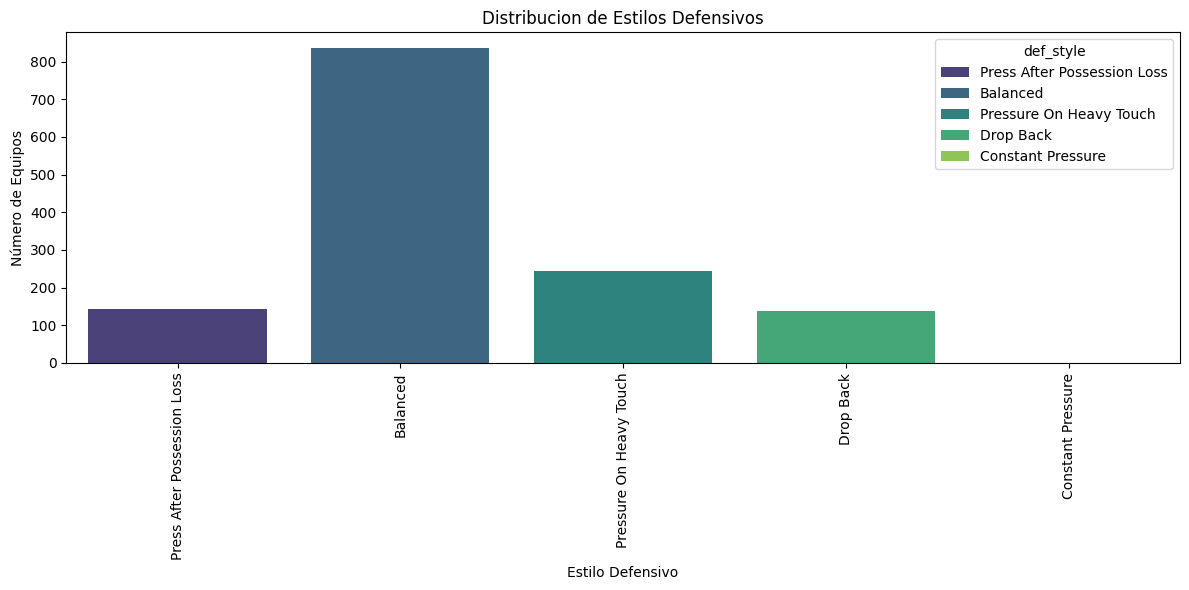

In [232]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_teams, x='def_style', palette='viridis', hue='def_style')
plt.title('Distribucion de Estilos Defensivos')
plt.xlabel('Estilo Defensivo')
plt.ylabel('Número de Equipos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### Def Team Width / Depth

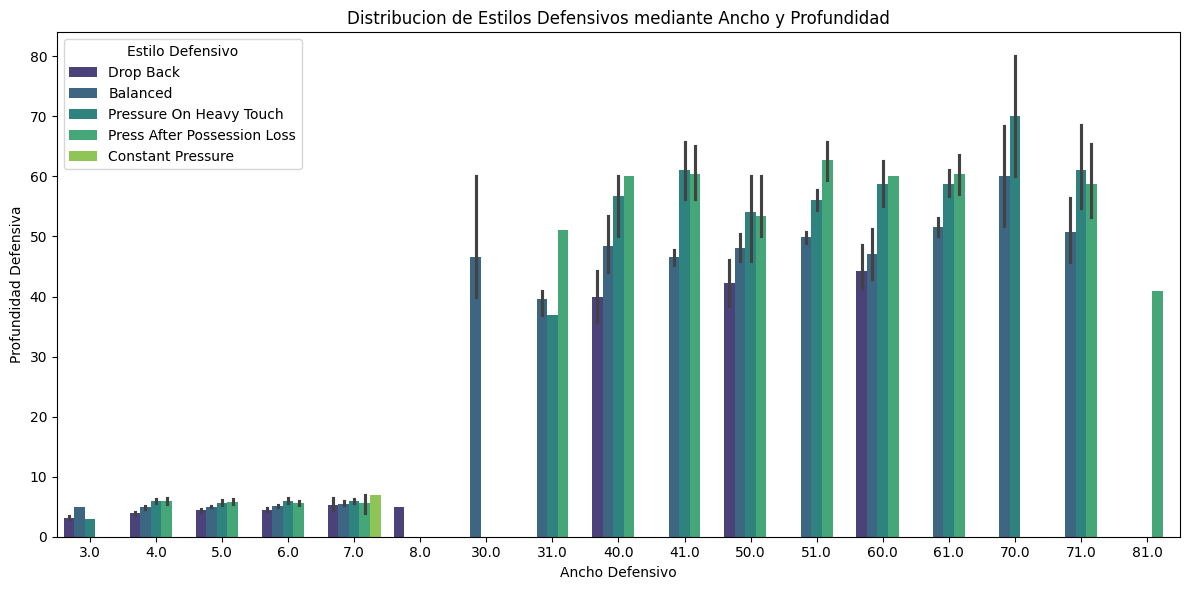

In [254]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_teams, x='def_team_width', y='def_team_depth', palette='viridis', hue='def_style')
plt.title('Distribucion de Estilos Defensivos mediante Ancho y Profundidad')
plt.xlabel('Ancho Defensivo')
plt.ylabel('Profundidad Defensiva')
plt.legend(title='Estilo Defensivo')
plt.tight_layout()
plt.show()

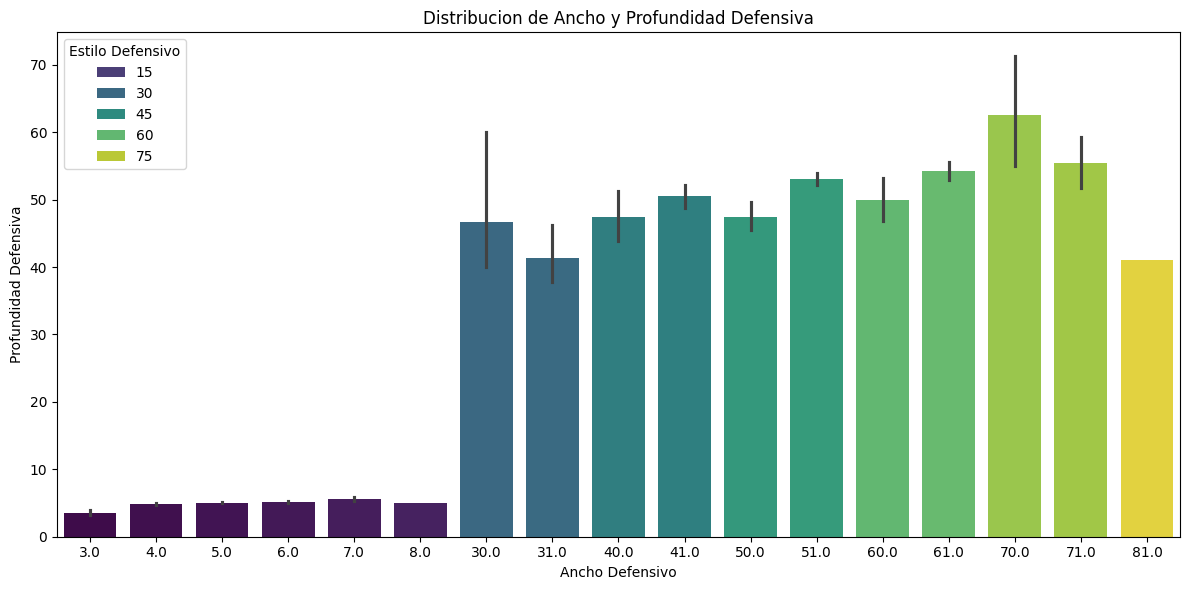

In [247]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_teams, x='def_team_width', y='def_team_depth', palette='viridis', hue='def_team_width')
plt.title('Distribucion de Ancho y Profundidad Defensiva')
plt.xlabel('Ancho Defensivo')
plt.ylabel('Profundidad Defensiva')
plt.legend(title='Estilo Defensivo')
plt.tight_layout()
plt.show()

##### Def Defence Pressure y Aggression

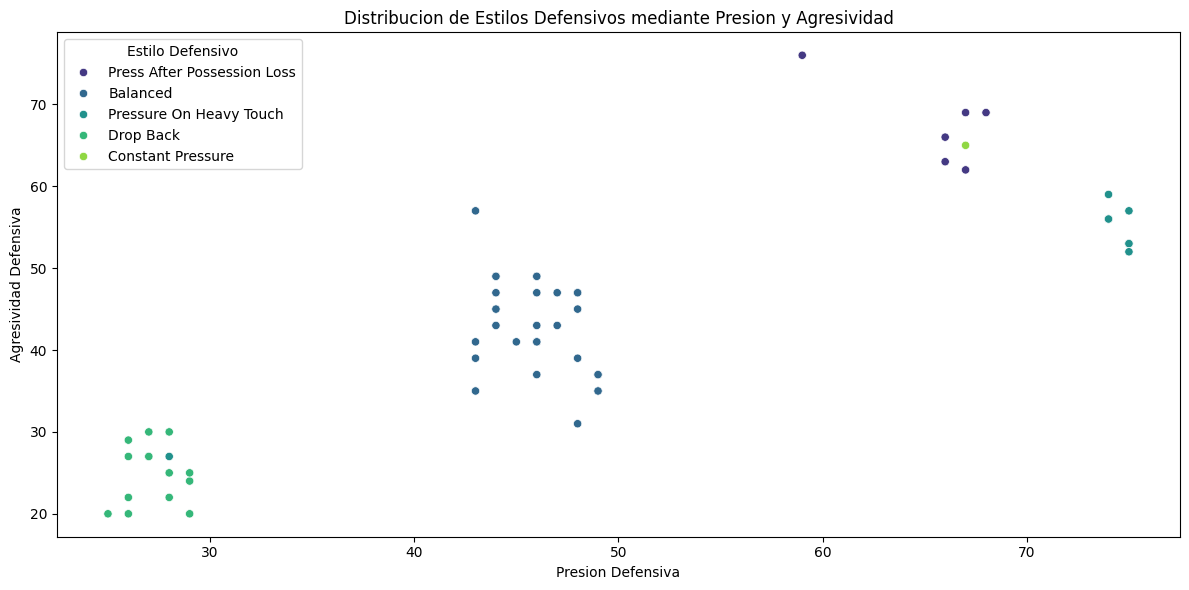

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_teams, x='def_defence_pressure', y='def_defence_aggression', hue='def_style', palette='viridis')
plt.title('Distribucion de Estilos Defensivos mediante Presion y Agresividad')
plt.xlabel('Presion Defensiva')
plt.ylabel('Agresividad Defensiva')
plt.legend(title='Estilo Defensivo')
plt.tight_layout()
plt.show()

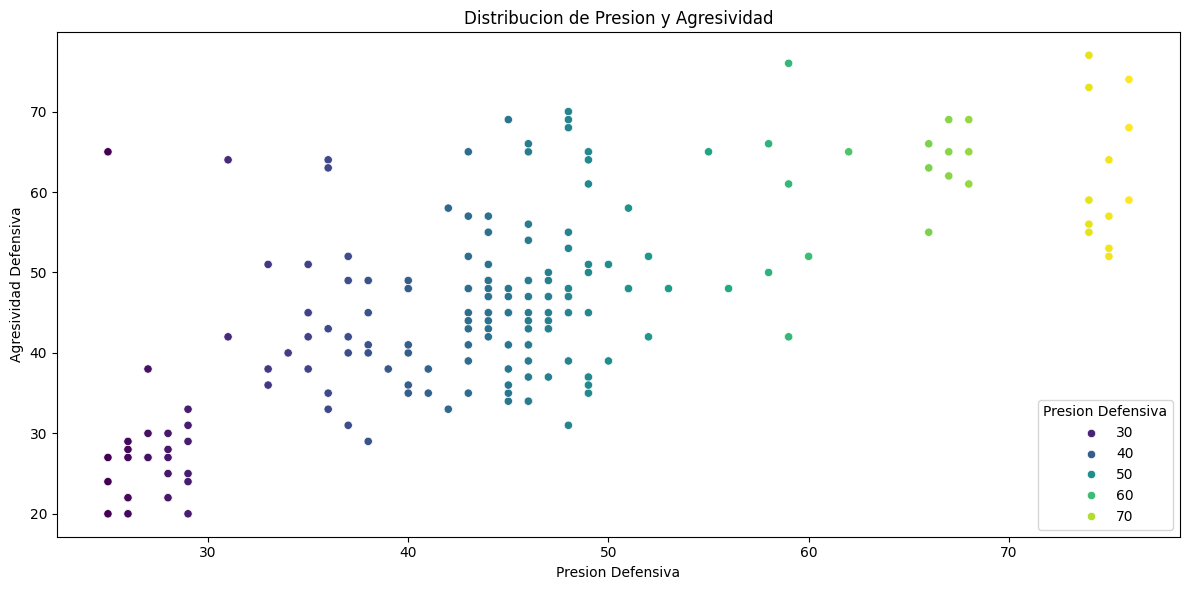

In [257]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_teams, x='def_defence_pressure', y='def_defence_aggression', hue='def_defence_pressure', palette='viridis')
plt.title('Distribucion de Presion y Agresividad')
plt.xlabel('Presion Defensiva')
plt.ylabel('Agresividad Defensiva')
plt.legend(title='Presion Defensiva')
plt.tight_layout()
plt.show()

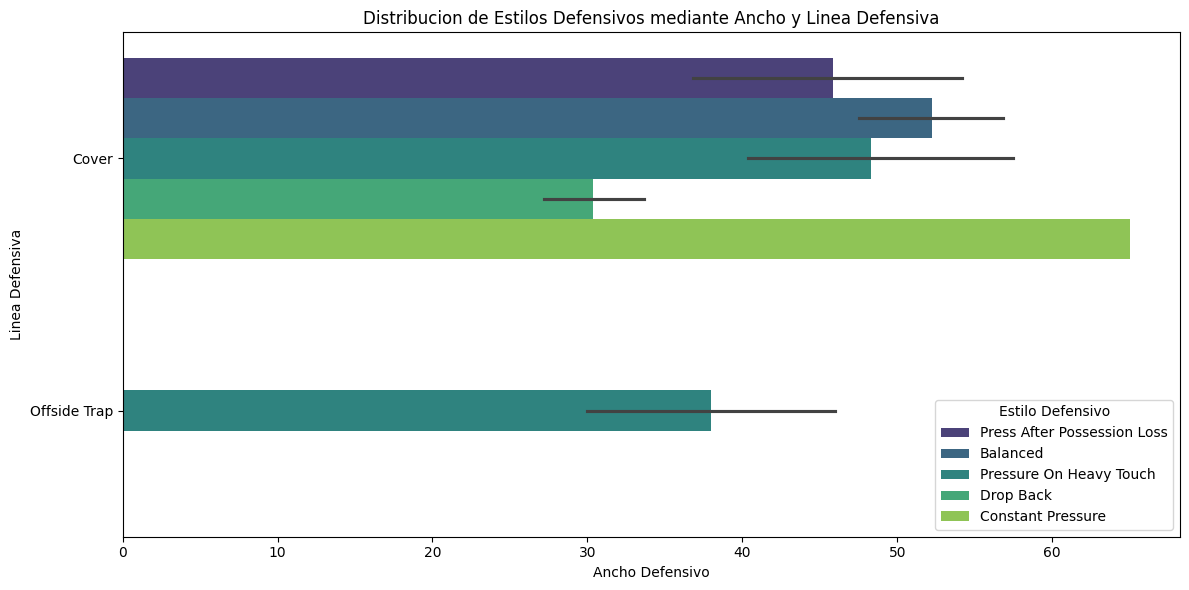

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_teams, x='def_defence_width', y='def_defence_defender_line', hue='def_style', palette='viridis')
plt.title('Distribucion de Estilos Defensivos mediante Ancho y Linea Defensiva')
plt.xlabel('Ancho Defensivo')
plt.ylabel('Linea Defensiva')
plt.legend(title='Estilo Defensivo')
plt.tight_layout()
plt.show()

#### Ofensive Play Style

In [ ]:
# 'off_style', 'off_build_up_play', 'off_chance_creation', 'off_team_width', 'off_players_in_box', 'off_corners', 'off_free_kicks'

#### Build Up Play

In [ ]:
# 'build_up_play_passing', 'build_up_play_positioning', 'chance_creation_passing', 'chance_creation_crossing', 'chance_creation_shooting', 'chance_creation_positioning'

#### Transfer Budget y Club Worth

In [ ]:
# 'transfer_budget_eur', 'club_worth_eur'